# Enzyme Single Substrate Analysis

In [7]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats.distributions import t
import matplotlib.pyplot as plt

In [8]:
#Enzyme Michaels-MEnton equation 
def func (x, Km, Vmax):
        return Vmax * x / (Km + x) 

#Enzyme Class with fit and stats
class Enzyme():
    
    def x(self):
        self.x
    def y(self):
        self.y

    def fits(self, Km, Vmax):   
        pars, pcov = curve_fit(func, self.x, self.y, p0=(Km, Vmax))
        residuals = self.y - func(self.x,pars[0],pars[1])
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((self.y-np.mean(self.y))**2)
        r_squared = 1 - (ss_res/ss_tot)
        alpha = 0.05 # 95% confidence interval = 100*(1-alpha)
        n = len(self.y)    # number of data points
        p = len(pars) # number of parameters
        dof = max(0, n - p) # number of degrees of freedom
        # student-t value for the dof and confidence level
        tval = t.ppf(1.0-alpha/2., dof) 
        for i, p,var in zip(range(n), pars, np.diag(pcov)):
            sigma = var**0.5
            print ('p{0}: [{1} [{2}  {3}]'.format(i, p, p - sigma*tval, p + sigma*tval))    
            
        print ("")
        print ("")
        print ("Km is:", round(pars[0],1), "+/-", round(np.sqrt(pcov[0,0]),1))
        print ("Vmax is:", round(pars[1],1),"+/-", round(np.sqrt(pcov[1,1]),1))
        print ("R^2 is:", round(r_squared,2))
        print ("Sum Squares is:", round(ss_res,2))
        plt.plot(self.x,self.y,'o')
        xfit = np.linspace(min(self.x),max(self.x), 100)
        yfit = func(xfit, pars[0], pars[1])
        plt.plot(xfit,yfit,'-')
        plt.legend(['data','fit'],loc='best')


# Initialize Enzyme class with data

p0: [37.462819598214864 [29.053797336525243  45.871841859904485]
p1: [102.5623791992517 [96.50586063540663  108.61889776309675]


Km is: 37.5 +/- 3.6
Vmax is: 102.6 +/- 2.6
R^2 is: 0.99
Sum Squares is: 63.97


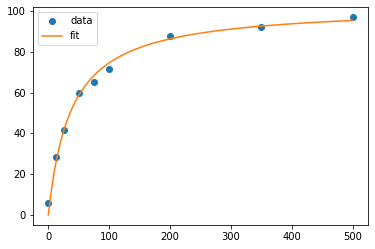

In [9]:
A = Enzyme()
A.x = np.array([0,12.5,25,50,75,100,200,350,500])
A.y = np.array([ 5.7, 28.4, 41.6, 59.9, 65.4, 71.76, 87.9, 92.3, 97.0])
A.fits(30,100) #Initial Guess for Km and Vmax

#p0 95% Confindence Interval for Km
#p1 95% Confindence Interval for Vmax